In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

## Confidence Interval(CI)
### Question 1
1. 生成50個~uniform(-3,3)分配之x值

In [224]:
x = np.random.uniform(low = -3, high = 3, size = 50)
print(x)

[-2.68230878  1.46545518  0.87406327 -2.22016016 -2.47270294  0.84720291
 -2.69326056 -1.66670474 -0.1389475   2.18737585 -2.94384321 -0.12032074
 -0.98693283 -2.36935306 -0.15889582 -2.18368322  2.53011792  1.20016744
  0.5471457  -1.36721657 -1.72592021 -1.82515727  1.58474253 -1.30373738
 -2.7645273  -0.49034573  2.17026879  0.26278934 -1.02645807  0.10754544
  0.28213222 -1.46367311  1.32955917  2.59622425  1.42425984  1.95582698
 -1.95081465 -0.16469802  0.9325109  -1.43998192  1.23272889 -1.56593218
 -1.65466514 -0.14965271  1.01564257 -1.12087377 -0.79059087 -2.53475851
 -2.03362977  2.01777962]


2.從y= 3-2*x+e 迴歸式生成50組y值

In [225]:
y= 3-2*x
print(y)

[ 8.36461756  0.06908964  1.25187346  7.44032032  7.94540589  1.30559418
  8.38652113  6.33340949  3.277895   -1.37475171  8.88768642  3.24064148
  4.97386566  7.73870613  3.31779165  7.36736645 -2.06023583  0.59966512
  1.9057086   5.73443314  6.45184042  6.65031454 -0.16948505  5.60747476
  8.52905461  3.98069146 -1.34053758  2.47442131  5.05291614  2.78490913
  2.43573556  5.92734622  0.34088167 -2.19244849  0.15148032 -0.91165395
  6.90162931  3.32939603  1.13497819  5.87996384  0.53454222  6.13186436
  6.30933028  3.29930541  0.96871485  5.24174754  4.58118175  8.06951701
  7.06725954 -1.03555924]


In [226]:
residual = np.random.normal(0, 1, size = (1, 50))
print(residual)

[[-0.53609449  0.16963914  0.22266744 -0.68232848 -0.83496767 -0.91471958
   0.72371098  0.60993218  1.89483124  0.27241684  1.37516461  0.76126877
  -1.2890321  -1.17960936  0.49725727 -0.30766293  0.90309855 -0.72551947
   0.19645749  1.25097182  0.21532224 -0.01769818  0.18535901 -0.40563172
   0.27711702 -0.60431873 -0.95580161  1.7145986  -1.12378727  0.5987301
  -0.15094147 -1.21102459  1.16510987  0.6700304  -0.07406366  0.4361907
   0.75065822 -1.44761376 -0.19844219  1.12521675  0.87731649  0.04326622
   0.75693269  0.30877882 -0.38417818 -1.11142907  1.21618525  0.25905978
  -1.91315372  0.95482271]]


In [227]:
y = np.add(y, residual)

In [228]:
y

array([[ 7.82852308,  0.23872878,  1.4745409 ,  6.75799183,  7.11043822,
         0.3908746 ,  9.1102321 ,  6.94334166,  5.17272624, -1.10233487,
        10.26285103,  4.00191025,  3.68483356,  6.55909677,  3.81504891,
         7.05970351, -1.15713728, -0.12585435,  2.1021661 ,  6.98540496,
         6.66716266,  6.63261635,  0.01587396,  5.20184304,  8.80617163,
         3.37637273, -2.29633919,  4.18901991,  3.92912887,  3.38363923,
         2.2847941 ,  4.71632163,  1.50599153, -1.52241809,  0.07741666,
        -0.47546325,  7.65228753,  1.88178228,  0.936536  ,  7.0051806 ,
         1.41185871,  6.17513058,  7.06626297,  3.60808424,  0.58453667,
         4.13031847,  5.797367  ,  8.32857679,  5.15410582, -0.08073653]])

3.繪製出代表x、y值的散佈圖

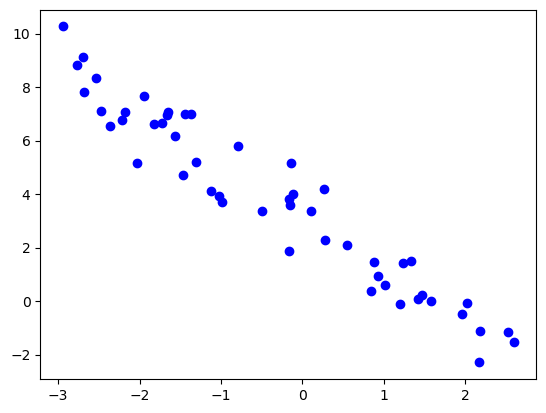

In [229]:
plt.scatter(x, y, c ="blue")

plt.show()

In [230]:
def interval(y, x, n=50):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sxx = np.sum((x - x_mean)**2)
    sxy = np.sum((x - x_mean)*(y - y_mean))
    coef = sxy/sxx
    intercept = y_mean - coef * x_mean
    sse = np.sum((y - (intercept + coef * x))**2)
    mse = sse / (n-2)
    lower_bound = coef - (mse/sxx)**0.5 * scipy.stats.t.ppf(q=.95,df=n-2)
    upper_bound = coef + (mse/sxx)**0.5 * scipy.stats.t.ppf(q=.95,df=n-2)
    return lower_bound,upper_bound

In [231]:
x_mean = np.mean(x)
y_mean = np.mean(y)
sxx = np.sum((x - x_mean)**2)
sxy = np.sum((x - x_mean)*(y - y_mean))
coef = sxy/sxx
print(coef)

-1.9146164549975262


4-5.前面有設定一函數，可自動計算confidence interval數值，可見beta1_hat=-1.9146，ci=[-2.043,-1.786]，有包含beta1真實值-2

In [232]:
interval(y, x)

(-2.043155206654044, -1.7860777033410082)

## Question2
D_bar數值如下所示:

m=10

In [214]:
D = 0
for i in range(10):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    interval(y, x)
    if (interval(y, x)[0] <= -2) & (interval(y, x)[1] >= -2):
        D = D+1
print(D/10)

0.9


m=100

In [215]:
D = 0
for i in range(100):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    interval(y, x)
    if (interval(y, x)[0] <= -2) & (interval(y, x)[1] >= -2):
        D = D+1
print(D/100)

0.88


m=100000

In [216]:
D = 0
for i in range(100000):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    interval(y, x)
    if (interval(y, x)[0] <= -2) & (interval(y, x)[1] >= -2):
        D = D+1
print(D/100000)

0.89878


## Hypothesis Test
### Question1
基本上1、2、3題做法與Confidence Interval Question1 前三題作法是相同的

In [217]:
x = np.random.uniform(low = -3, high = 3, size = 50)
y = 3-2*x
residual = np.random.normal(0, 1, size = (1, 50))
y = np.add(y, residual)

4.test statistic & sampling distribution: $$ \frac{\hat\beta_{1}-(-2)}{\sqrt\frac{SSE}{N-2}}\sim{T(N-2)} $$
下面創一個函數紀錄realized test statistic數值:0.3109

In [218]:
def t_value(y, x, n=50):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sxx = np.sum((x - x_mean)**2)
    sxy = np.sum((x - x_mean)*(y - y_mean))
    coef = sxy/sxx
    intercept = y_mean - coef * x_mean
    sse = np.sum((y - (intercept + coef * x))**2)
    mse = sse / (n-2)
    t =  (coef+2) / (mse/sxx)**0.5
    return t

In [219]:
t_value(y, x)

0.31086771204051616

5.

In [220]:
if (t_value(y, x) < -scipy.stats.t.ppf(q=.95,df=48)) | (t_value(y, x) > scipy.stats.t.ppf(q=.95,df=48)):
    print("reject H0")
else:
    print("Do not reject H0")

Do not reject H0


### Question3
D_bar數值如下所示:

m=10

In [221]:
D = 0
for i in range(10):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    if (t_value(y, x) < -scipy.stats.t.ppf(q=.95,df=48)) | (t_value(y, x) > scipy.stats.t.ppf(q=.95,df=48)):
        D = D+1
print(D/10)

0.0


m=1000

In [222]:
D = 0
for i in range(100):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    if (t_value(y, x) < -scipy.stats.t.ppf(q=.95,df=48)) | (t_value(y, x) > scipy.stats.t.ppf(q=.95,df=48)):
        D = D+1
print(D/100)

0.12


m=100000

In [223]:
D = 0
for i in range(100000):
    x = np.random.uniform(low = -3, high = 3, size = 50)
    y = 3-2*x
    residual = np.random.normal(0, 1, size = (1, 50))
    y = np.add(y, residual)
    if (t_value(y, x) < -scipy.stats.t.ppf(q=.95,df=48)) | (t_value(y, x) > scipy.stats.t.ppf(q=.95,df=48)):
        D = D+1
print(D/100000)

0.09983
